# Project: Investigate a Dataset - TMDB Movie Data

## Introduction
> The information about 10,000 movies in this data set comes from The Movie Database (TMDB). There are 21 columns in the data set and they are: <br>
1. id - unique ID for each row<br>
2. imdb_id - the ID of the movie in IMDB<br>
3. popularity - popularity rating<br>
4. budget - budget of the movie in dollars<br>
5. revenue - revenue of the movie in dollars<br>
6. original_title - title of the movie<br>
7. cast - cast in the movie<br>
8. homepage - homepage of the movie<br>
9. director - director of the movie<br>
10. tagline - tagline of the movie<br>
11. keywords - words to describe the movie<br>
12. overview - general review of the movie<br>
13. runtime - duration of the movie<br>
14. genres - genre/s of the movie<br>
15. production_companies - company that manages the movie<br>
16. release_date - release date of the movie<br>
17. vote_count - vote count of the movie<br>
18. vote_average - average vote of the movie<br>
19. release_year - release year of the movie<br>
20. budget_adj - budget in terms of 2010 dollars <br>
21. revenue_adj - revenue in terms of 2010 dollars
    

## Questions (5)
> 1. Is the budget of movies getting higher or lower or staying the same over time? <br>
  1B. Did movies with higher runtime have a bigger budget?
2. What is the relationship between years and the amount of movies? <br>
  2B. What is the relationship between months and the amount of movies? <br>
3. What movie has the largest earned revenue? The least? <br>
4. What is the most popular genre? <br>
5. What is the average runtime of all the movies? <br>

In [1]:
#packages that I plan on using
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv


## Data Wrangling

In [2]:
#loading the data and printing out a few rows
film_dt = pd.read_csv('tmdb-movies.csv')
film_dt.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#examining all the columns' data types
film_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#describing the data
film_dt.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Dropping columns that are not needed in the analysis**

In [5]:
#dropping columns for readability
dropped_columns = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]
film_dt.drop(dropped_columns, inplace=True, axis=1)

In [6]:
#checking to see if there are any duplicates in the data
sum(film_dt.duplicated())

1

**Dropping any duplicates**

In [7]:
#dropping duplicates
film_dt.drop_duplicates(inplace=True)

In [8]:
#checking to see if there are any duplicates in the data
sum(film_dt.duplicated())

0

**Converting the column 'release_date' type to date**

In [9]:
#converting the column 'release_date' type to date 
film_dt["release_date"] = pd.to_datetime(film_dt["release_date"])

**Replacing all values of 0 with NaN**

In [10]:
#replacing all values of 0 with NaN
film_dt = film_dt.replace(0, np.nan)

**Dropping all the null values from the data**

In [11]:
#dropping the null values
film_dt = film_dt.dropna()

**Converting the columns 'budget' and 'revenue' types to int**

In [12]:
#converting the columns 'budget' and 'revenue' to int
type_change = ['budget', 'revenue']
#changing data type
film_dt[type_change] = film_dt[type_change].applymap(np.int64)

In [13]:
#checking if the all the conversions have taken effect
film_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3807 non-null float64
budget                  3807 non-null int64
revenue                 3807 non-null int64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null float64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
budget_adj              3807 non-null float64
revenue_adj             3807 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 446.1+ KB


## The Cleaning Process Summary
* I dropped the columns "id", "imdb_id", "cast", "homepage", "tagline", "keywords", and "overview" since I won't be using them for data analysis.
* I dropped any duplicate rows.
* I changed the "release_date" column's data type from string to date.
* I dropped the null or 0 values from the data.
* I changed the "budget" and "revenue" columns' data types from float to int.

## Exploratory Data Analysis

### Research Question 1: Is the budget of movies getting higher or lower or staying the same overtime?

In [14]:
#function that calculates the mean for the 2nd column(c2) and groupby by the first column(c1)
def average_groupby(c1, c2):
    average_groupby_data = film_dt.groupby(c1)[c2].mean()
    return average_groupby_data

Text(0.5,1,'Average Budget vs. Years')

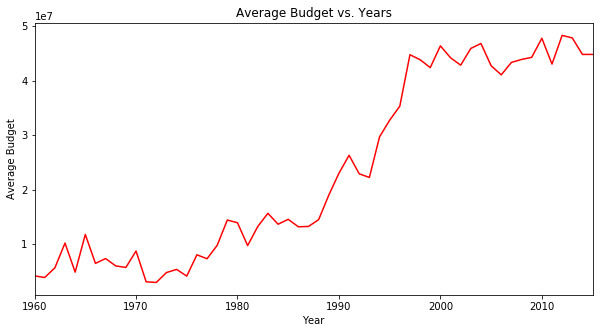

In [15]:
#calling the average_groupby function with release_year and budget arguments
yr_budget_average = average_groupby('release_year','budget')

#plotting the relationship between release_year and budget using a line graph
yr_budget_average.plot(kind = 'line', color = 'red', figsize = (10,5))
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.title('Average Budget vs. Years')

The average budget has increased significantly from 1960 to 2015. The 2010s have the biggest average budget to produce movies while the 1960s have the lowest. It is worth noting that there is a huge increase of budget between 1990 and 2000.

#### Research Question 1B: Did movies with higher runtime have a bigger budget?

Text(0.5,1,'Average Budget vs. Runtime')

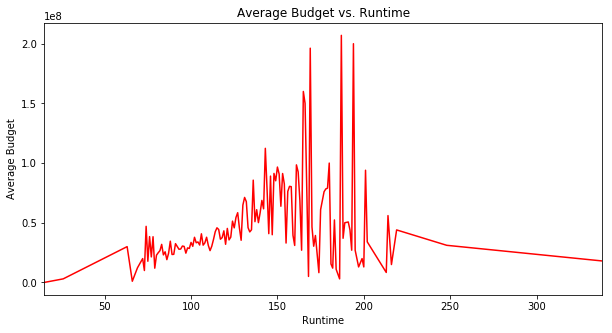

In [16]:
#calling the average_groupby function with runtime and budget arguments
runtime_budget_average = average_groupby('runtime','budget')

#plotting the relationship between runtime and budget using a line graph
runtime_budget_average.plot(kind = 'line', color = 'red', figsize = (10,5))
plt.xlabel('Runtime')
plt.ylabel('Average Budget')
plt.title('Average Budget vs. Runtime')

On average, films that have a runtime between 150 and 200 have a bigger budget than films whose runtimes are less than 150 or more than 200. 

### Research Question 2: What is the relationship between years and the amount of movies?

Text(0.5,1,'Amount of Movies per Year')

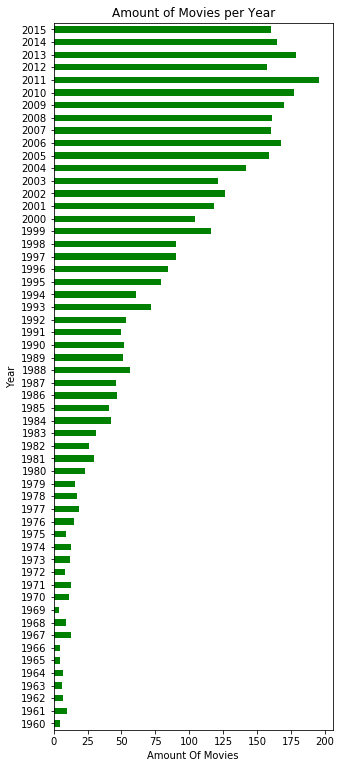

In [17]:
#counting the amount of movies per year and then sorting the result
yr_movies_total = film_dt['release_year'].value_counts().sort_index()

#plotting the relationship between release_year and the amount of movies using a horizontal bar graph
yr_movies_total.plot(kind = 'barh', color = 'green', figsize = (5,13))
plt.xlabel('Amount Of Movies')
plt.ylabel('Year')
plt.title('Amount of Movies per Year')

The number of movies released has increased significantly from 1960 to 2015. The year 2011 has released the most movies while the year 1969 has released the fewest. It is worth noting that 2011 alone has released more movies than the entire '60s and 
'70s combined. 

#### Research Question 2B: What is the relationship between months and the amount of movies?

In [18]:
#outputting the total number of movies released in each month in all of the years
mon_movies_total = film_dt['release_date'].dt.month.value_counts().sort_index()
mon_movies_total

1     219
2     252
3     277
4     261
5     290
6     339
7     308
8     334
9     453
10    360
11    303
12    411
Name: release_date, dtype: int64

Text(0.5,1,'Amount of Movies per Month')

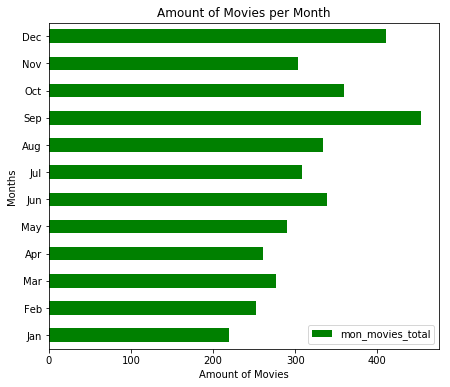

In [19]:
#setting up the months
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_movies_total = pd.DataFrame(mon_movies_total)
mon_movies_total['month'] = mon
mon_movies_total.rename(columns = {'release_date':'mon_movies_total'}, inplace = True)

#plotting the relationship between months and the amount of movies using a horizontal bar graph
mon_movies_total.plot(x = 'month', kind = 'barh', color = 'green', figsize = (7,6))
plt.xlabel('Amount of Movies')
plt.ylabel('Months')
plt.title('Amount of Movies per Month')

The month of September has released the most movies while the month of January has released the fewest. The top 3 highest months are September, December, and October.

### Research Question 3: What movie has the largest earned revenue? The least?

In [20]:
#function that finds the maximum and the minimum value
def max_min(x):
    #using the function 'idmin' to find the index of the lowest value.
    idx_min = film_dt[x].idxmin()
    #using the function 'idmax' to find the index of highest value.
    idx_max = film_dt[x].idxmax()
    high = pd.DataFrame(film_dt.loc[idx_max,:])
    low = pd.DataFrame(film_dt.loc[idx_min,:])
    
    return pd.concat([high,low], axis = 1)

In [21]:
max_min('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46


The film that has the highest earned revenue is "Avatar" with a value of 2.7 Billion Dollars, while the film that has the lowest earned revenue is "Shattered Glass" with a value of 2 Dollars. 

### Research Question 4: What is the most popular genre?

In [22]:
#function that separates the data in genres column since there are multiple genre values, and counts the number of movies in each genre
def spt_count(c):
    spt_data = pd.Series(film_dt[c].str.cat(sep = '|').split('|'))
    
    tot_data = spt_data.value_counts(ascending=False)
    return tot_data

Text(0,0.5,'')

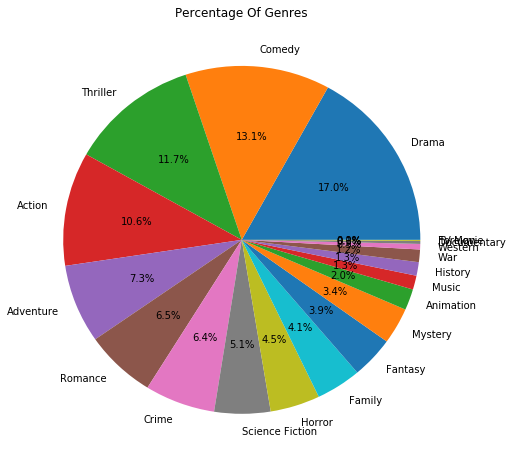

In [23]:
# Plotting the relationship between genres and amount of movies using a pie chart.
spt_count('genres').plot(kind = 'pie', figsize = (8,8), autopct = '%1.1f%%')
plt.title('Percentage Of Genres')
plt.ylabel('')

The most popular genre in the film industry from 1960 to 2015 is Drama. Drama takes up about 17% of the pie chart. The next three highest genres are Comedy, Thriller, and Action, respectively. Adding the four aformentioned genres takes up about half of the pie chart. 

### Research Question 5: What is the average runtime of all the movies?

In [24]:
#function that calculates the mean for the column (c1)
def average_col(c1):
    return film_dt[c1].mean()

#calling the average_col function with runtime argument
average_col('runtime')

109.35093249277647

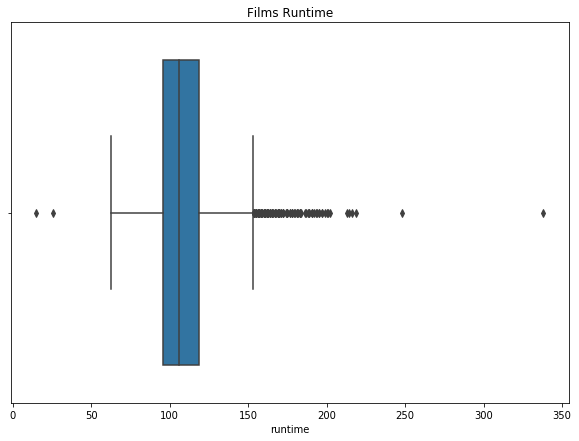

In [25]:
#Plotting the average runtime using boxplot
plt.figure(figsize = (10,7))
sns.boxplot(film_dt['runtime'])
plt.title('Films Runtime')
plt.show()

The average duration of all the movies is 109 minutes. The lowest duration is about 15 minutes while the highest duration is about 340 minutes. 

## Conclusions

1. The first question "Is the budget of movies getting higher or lower or staying the same over time?" has shown predictable results. Looking at the line graph, we can see the average budget to produce films is increasing over time. There is also a significant difference between the budget of films made in the 1960s and the budget of films made in the 2010s. 
> 1B. The question "Did movies with higher runtime have a bigger budget" has shown surprising results. Looking at the line graph, we can see that movies with a runtime between 150 and 200 have a bigger budget than movies with a runtime that fall outside of that range. 


2. In the second question "What is the relationship between years and the amount of movies?" the number of movies released has increased significantly from the year 1960 to 2015. It's also worth noting that the year 2011 alone has released more movies than the entire 1960s and 1970s combined.
> 2B. In the question "what is the relationship between months and the amount of movies?" the month of September has released the most movies, followed by December and October. It's interesting that there is a greater number of movies that is released in the fall season than in any season.

3. In the third question "What movie has the largest earned revenue? The least?" Avatar has the highest earned revenue with a value of 2.7 Billion Dollars, while Shattered Glass has the lowest earned revenue with a value of 2 Dollars.

4. In the fourth question "What is the most popular genre?" Drama is the most popular genre in the film industry from 1960 to 2015, followed by Comedy, Thriller, and Action. These four genres take up about 50% of the pie chart.

5. In the fifth question "What is the average runtime of all the movies?" the answer is 109 minutes. The highest duration is about 340 minutes while the lowest duration is about 15 minutes.

## Limitations

Due to missing values, we had to delete many rows in the data, which ultimately affected our overall results. We also altered the datatypes of some columns in the data. Additionally, we are not certain if the TMDB data included some of the popular movies from all over the world. 